<a href="https://colab.research.google.com/github/Emma-Ok/Phishing-Detection-ML/blob/main/Features_Selection_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import (
    SelectKBest, chi2, f_classif, mutual_info_classif,
    VarianceThreshold
)
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

TEST_SIZE = 0.2
RANDOM_STATE = 42

print("=== CARGA DEL DATASET ===")
url = "https://raw.githubusercontent.com/Emma-Ok/Phishing-Detection-ML/main/Phishing_Legitimate_full.csv"
df = pd.read_csv(url).drop(columns=["id"])
X = df.drop(columns=["CLASS_LABEL"])
y = df["CLASS_LABEL"]

print(f"Dataset cargado: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Distribución de clases: {y.value_counts().to_dict()}")
print(f"Características: {list(X.columns)}")


# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")


=== CARGA DEL DATASET ===
Dataset cargado: 10000 muestras, 48 características
Distribución de clases: {1: 5000, 0: 5000}
Características: ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', '

In [29]:
print("\n=== 1. ANÁLISIS DE VARIANZA ===")

# Calcular varianza de cada característica
variance_analysis = pd.DataFrame({
    'feature': X.columns,
    'variance': X.var(),
    'std': X.std(),
    'min': X.min(),
    'max': X.max(),
    'unique_values': X.nunique()
})

variance_analysis = variance_analysis.sort_values('variance').reset_index(drop=True)
print("Características ordenadas por varianza (menor a mayor):")
print(variance_analysis.head(10))

# Identificar características con varianza extremadamente baja
low_variance_threshold = 0.01
low_variance_features = variance_analysis[variance_analysis['variance'] < low_variance_threshold]['feature'].tolist()
print(f"\nCaracterísticas con varianza < {low_variance_threshold}: {low_variance_features}")



=== 1. ANÁLISIS DE VARIANZA ===
Características ordenadas por varianza (menor a mayor):
               feature  variance       std  min  max  unique_values
0      HttpsInHostname  0.000000  0.000000  0.0  0.0              1
1             AtSymbol  0.000300  0.017319  0.0  1.0              2
2    DoubleSlashInPath  0.000899  0.029988  0.0  1.0              2
3              NumHash  0.002295  0.047906  0.0  1.0              2
4          PopUpWindow  0.004876  0.069832  0.0  1.0              2
5  FakeLinkInStatusBar  0.005470  0.073961  0.0  1.0              2
6              NoHttps  0.011076  0.105241  0.0  1.0              2
7          TildeSymbol  0.012930  0.113709  0.0  1.0              2
8   RightClickDisabled  0.013805  0.117496  0.0  1.0              2
9            IpAddress  0.016906  0.130023  0.0  1.0              2

Características con varianza < 0.01: ['HttpsInHostname', 'AtSymbol', 'DoubleSlashInPath', 'NumHash', 'PopUpWindow', 'FakeLinkInStatusBar']


In [30]:
# 2. ANÁLISIS DE CORRELACIÓN CON LA VARIABLE OBJETIVO
print("\n=== 2. CORRELACIÓN CON VARIABLE OBJETIVO ===")

# Calcular diferentes tipos de correlación
correlation_analysis = pd.DataFrame({'feature': X.columns})

# Correlación de Pearson
pearson_corrs = []
pearson_pvals = []
for feature in X.columns:
    corr, pval = pearsonr(X[feature], y)
    pearson_corrs.append(abs(corr))
    pearson_pvals.append(pval)

correlation_analysis['pearson_corr'] = pearson_corrs
correlation_analysis['pearson_pval'] = pearson_pvals

# Correlación de Spearman
spearman_corrs = []
spearman_pvals = []
for feature in X.columns:
    corr, pval = spearmanr(X[feature], y)
    spearman_corrs.append(abs(corr))
    spearman_pvals.append(pval)

correlation_analysis['spearman_corr'] = spearman_corrs
correlation_analysis['spearman_pval'] = spearman_pvals

# Ordenar por correlación de Pearson
correlation_analysis = correlation_analysis.sort_values('pearson_corr').reset_index(drop=True)
print("Características con menor correlación con la variable objetivo:")
print(correlation_analysis.head(10))


=== 2. CORRELACIÓN CON VARIABLE OBJETIVO ===
Características con menor correlación con la variable objetivo:
                feature  pearson_corr  pearson_pval  spearman_corr  \
0      ImagesOnlyInForm      0.001165  9.072740e-01       0.001165   
1   FakeLinkInStatusBar      0.014873  1.369536e-01       0.014873   
2              AtSymbol      0.017323  8.323367e-02       0.017323   
3       NumNumericChars      0.019122  5.586392e-02       0.231869   
4    PctExtResourceUrls      0.021922  2.836468e-02       0.133580   
5     DoubleSlashInPath      0.023344  1.957425e-02       0.023344   
6        SubdomainLevel      0.043132  1.598168e-05       0.008603   
7               NumHash      0.048014  1.558954e-06       0.048014   
8  PctExtResourceUrlsRT      0.052089  1.870342e-07       0.073768   
9           PopUpWindow      0.067308  1.610284e-11       0.067308   

   spearman_pval  
0   9.072740e-01  
1   1.369536e-01  
2   8.323367e-02  
3  3.622905e-122  
4   4.842755e-41  
5   1

In [31]:
print("\n=== 3. MUTUAL INFORMATION ===")

# Calcular mutual information
mi_scores = mutual_info_classif(X_train, y_train, random_state=RANDOM_STATE)
mi_analysis = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mi_scores
}).sort_values('mutual_info').reset_index(drop=True)

print("Características con menor mutual information:")
print(mi_analysis.head(10))



=== 3. MUTUAL INFORMATION ===
Características con menor mutual information:
               feature  mutual_info
0              NumHash     0.000000
1    DoubleSlashInPath     0.000000
2      HttpsInHostname     0.000000
3   DomainInSubdomains     0.000000
4     ImagesOnlyInForm     0.000000
5  FakeLinkInStatusBar     0.000000
6             AtSymbol     0.000228
7   RelativeFormAction     0.000410
8           ExtFavicon     0.001920
9        NumUnderscore     0.002569


In [32]:
print("\n=== 4. F-SCORE (ANOVA) ===")

# Calcular F-scores
f_scores, f_pvals = f_classif(X_train, y_train)
f_analysis = pd.DataFrame({
    'feature': X.columns,
    'f_score': f_scores,
    'f_pval': f_pvals
}).sort_values('f_score').reset_index(drop=True)

print("Características con menor F-score:")
print(f_analysis.head(10))



=== 4. F-SCORE (ANOVA) ===
Características con menor F-score:
                feature    f_score        f_pval
0      ImagesOnlyInForm   0.037589  8.462760e-01
1   FakeLinkInStatusBar   2.704338  1.001149e-01
2       NumNumericChars   2.830950  9.250267e-02
3    PctExtResourceUrls   2.916595  8.771150e-02
4              AtSymbol   3.001501  8.322596e-02
5     DoubleSlashInPath   4.505915  3.380844e-02
6        SubdomainLevel  13.697294  2.162061e-04
7               NumHash  17.068290  3.642682e-05
8  PctExtResourceUrlsRT  17.539859  2.843672e-05
9           PopUpWindow  29.341775  6.243705e-08


In [33]:
print("\n=== 5. ANÁLISIS DE MULTICOLINEALIDAD ===")

# Matriz de correlación entre características
corr_matrix = X.corr().abs()

# Encontrar pares de características altamente correlacionadas
high_corr_threshold = 0.9
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > high_corr_threshold:
            high_corr_pairs.append({
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            })

high_corr_df = pd.DataFrame(high_corr_pairs)
if not high_corr_df.empty:
    print(f"Pares de características con correlación > {high_corr_threshold}:")
    print(high_corr_df)
else:
    print(f"No se encontraron pares con correlación > {high_corr_threshold}")



=== 5. ANÁLISIS DE MULTICOLINEALIDAD ===
No se encontraron pares con correlación > 0.9


In [34]:
print("\n=== 6. CONSOLIDACIÓN DE ANÁLISIS ===")

# Crear dataframe consolidado
consolidated_df = pd.DataFrame({'feature': X.columns})

# Agregar métricas
consolidated_df = consolidated_df.merge(variance_analysis[['feature', 'variance']], on='feature')
consolidated_df = consolidated_df.merge(correlation_analysis[['feature', 'pearson_corr', 'pearson_pval']], on='feature')
consolidated_df = consolidated_df.merge(mi_analysis[['feature', 'mutual_info']], on='feature')
consolidated_df = consolidated_df.merge(f_analysis[['feature', 'f_score', 'f_pval']], on='feature')

# Calcular ranking compuesto (menor valor = peor característica)
consolidated_df['variance_rank'] = consolidated_df['variance'].rank()
consolidated_df['pearson_rank'] = consolidated_df['pearson_corr'].rank()
consolidated_df['mi_rank'] = consolidated_df['mutual_info'].rank()
consolidated_df['f_score_rank'] = consolidated_df['f_score'].rank()

# Ranking promedio
consolidated_df['avg_rank'] = (
    consolidated_df['variance_rank'] +
    consolidated_df['pearson_rank'] +
    consolidated_df['mi_rank'] +
    consolidated_df['f_score_rank']
) / 4

consolidated_df = consolidated_df.sort_values('avg_rank').reset_index(drop=True)

print("Ranking consolidado (peores características primero):")
print(consolidated_df[['feature', 'variance', 'pearson_corr', 'mutual_info', 'f_score', 'avg_rank']].head(15))



=== 6. CONSOLIDACIÓN DE ANÁLISIS ===
Ranking consolidado (peores características primero):
                feature  variance  pearson_corr  mutual_info    f_score  \
0   FakeLinkInStatusBar  0.005470      0.014873     0.000000   2.704338   
1              AtSymbol  0.000300      0.017323     0.000228   3.001501   
2      ImagesOnlyInForm  0.029479      0.001165     0.000000   0.037589   
3     DoubleSlashInPath  0.000899      0.023344     0.000000   4.505915   
4               NumHash  0.002295      0.048014     0.000000  17.068290   
5           PopUpWindow  0.004876      0.067308     0.010960  29.341775   
6    RightClickDisabled  0.013805      0.074900     0.002813  40.344543   
7               NoHttps  0.011076      0.072219     0.007247  44.401761   
8            ExtFavicon  0.139258      0.069140     0.001920  45.941291   
9    DomainInSubdomains  0.021709      0.100452     0.000000  79.821733   
10           NumPercent  0.387192      0.068465     0.005133  36.955740   
11      

In [35]:
print("\n=== 7. CARACTERÍSTICAS CANDIDATAS A ELIMINACIÓN ===")

# Criterios para eliminación
elimination_candidates = set()

# Criterio 1: Baja varianza
if low_variance_features:
    elimination_candidates.update(low_variance_features)
    print(f"Por baja varianza: {low_variance_features}")

# Criterio 2: Baja correlación con objetivo (p-value no significativo)
low_corr_features = correlation_analysis[
    (correlation_analysis['pearson_pval'] > 0.05) |
    (correlation_analysis['pearson_corr'] < 0.05)
]['feature'].tolist()
elimination_candidates.update(low_corr_features[:5])  # Top 5 peores
print(f"Por baja correlación: {low_corr_features[:5]}")

# Criterio 3: Bajo mutual information
low_mi_features = mi_analysis.head(5)['feature'].tolist()
elimination_candidates.update(low_mi_features)
print(f"Por bajo mutual information: {low_mi_features}")

# Criterio 4: Bajo F-score (p-value no significativo)
low_f_features = f_analysis[
    (f_analysis['f_pval'] > 0.05) |
    (f_analysis['f_score'] < 1.0)
]['feature'].tolist()
elimination_candidates.update(low_f_features[:5])  # Top 5 peores
print(f"Por bajo F-score: {low_f_features[:5]}")

print(f"\nTOTAL CARACTERÍSTICAS CANDIDATAS A ELIMINACIÓN: {len(elimination_candidates)}")
print(f"Características: {sorted(elimination_candidates)}")



=== 7. CARACTERÍSTICAS CANDIDATAS A ELIMINACIÓN ===
Por baja varianza: ['HttpsInHostname', 'AtSymbol', 'DoubleSlashInPath', 'NumHash', 'PopUpWindow', 'FakeLinkInStatusBar']
Por baja correlación: ['ImagesOnlyInForm', 'FakeLinkInStatusBar', 'AtSymbol', 'NumNumericChars', 'PctExtResourceUrls']
Por bajo mutual information: ['NumHash', 'DoubleSlashInPath', 'HttpsInHostname', 'DomainInSubdomains', 'ImagesOnlyInForm']
Por bajo F-score: ['ImagesOnlyInForm', 'FakeLinkInStatusBar', 'NumNumericChars', 'PctExtResourceUrls', 'AtSymbol']

TOTAL CARACTERÍSTICAS CANDIDATAS A ELIMINACIÓN: 10
Características: ['AtSymbol', 'DomainInSubdomains', 'DoubleSlashInPath', 'FakeLinkInStatusBar', 'HttpsInHostname', 'ImagesOnlyInForm', 'NumHash', 'NumNumericChars', 'PctExtResourceUrls', 'PopUpWindow']



=== 8. ANÁLISIS DETALLADO DE PEORES CARACTERÍSTICAS ===
Las 10 peores características: ['FakeLinkInStatusBar', 'AtSymbol', 'ImagesOnlyInForm', 'DoubleSlashInPath', 'NumHash', 'PopUpWindow', 'RightClickDisabled', 'NoHttps', 'ExtFavicon', 'DomainInSubdomains']


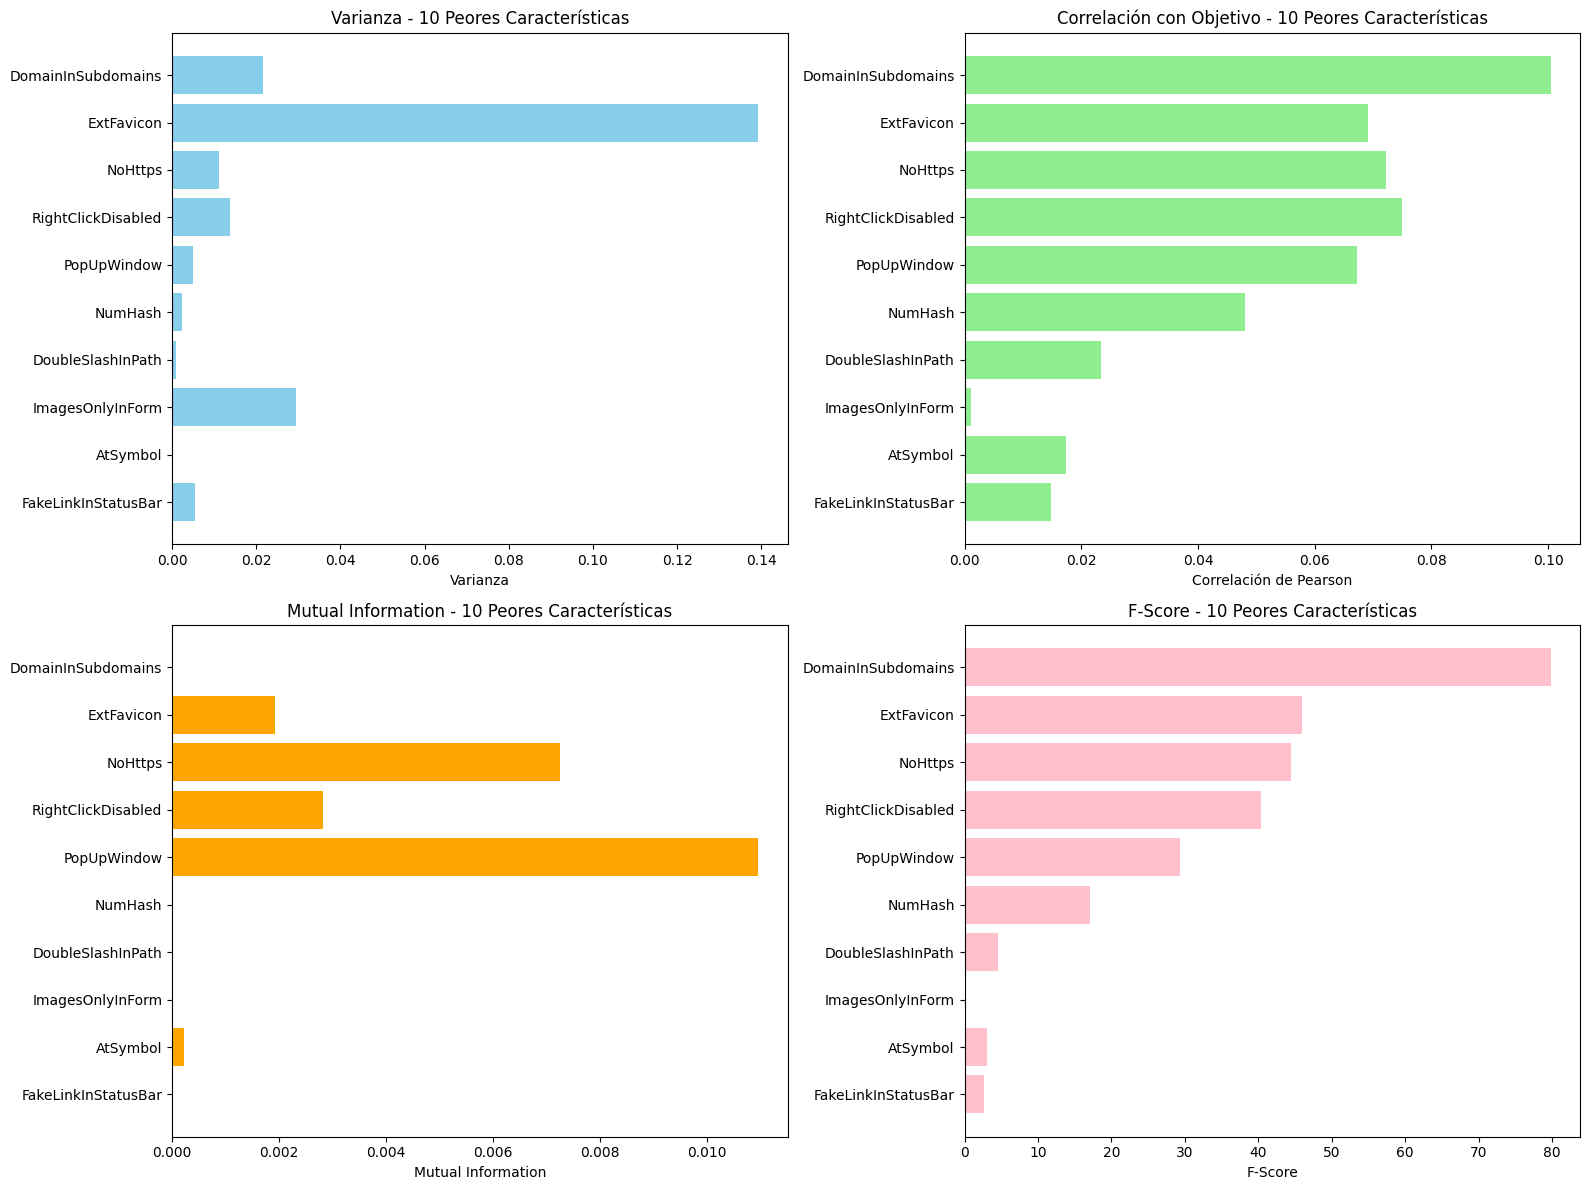

In [39]:
print("\n=== 8. ANÁLISIS DETALLADO DE PEORES CARACTERÍSTICAS ===")

worst_features = consolidated_df.head(10)['feature'].tolist()
print(f"Las 10 peores características: {worst_features}")

# Gráfico de barras para las peores características
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Varianza de peores características
worst_variance = consolidated_df.head(10)
axes[0,0].barh(worst_variance['feature'], worst_variance['variance'], color='skyblue')
axes[0,0].set_title('Varianza - 10 Peores Características')
axes[0,0].set_xlabel('Varianza')

# Correlación de peores características
axes[0,1].barh(worst_variance['feature'], worst_variance['pearson_corr'], color='lightgreen')
axes[0,1].set_title('Correlación con Objetivo - 10 Peores Características')
axes[0,1].set_xlabel('Correlación de Pearson')

# Mutual Information de peores características
axes[1,0].barh(worst_variance['feature'], worst_variance['mutual_info'], color='orange')
axes[1,0].set_title('Mutual Information - 10 Peores Características')
axes[1,0].set_xlabel('Mutual Information')

# F-Score de peores características
axes[1,1].barh(worst_variance['feature'], worst_variance['f_score'], color='pink')
axes[1,1].set_title('F-Score - 10 Peores Características')
axes[1,1].set_xlabel('F-Score')

plt.tight_layout()
plt.show()


In [40]:
print("\n=== 11. RESUMEN FINAL===")
print("="*60)
print(f"DATASET ORIGINAL: {X.shape[1]} características")
print(f"CARACTERÍSTICAS CANDIDATAS A ELIMINACIÓN: {len(elimination_candidates)}")
print(f"CARACTERÍSTICAS RESTANTES DESPUÉS DE FILTRADO: {X.shape[1] - len(elimination_candidates)}")
print("="*60)

print("\nRESUMEN POR CRITERIO:")
print(f"• Baja varianza (< {low_variance_threshold}): {len(low_variance_features)} características")
print(f"• Baja correlación con objetivo: {len(low_corr_features[:5])} características")
print(f"• Bajo mutual information: {len(low_mi_features)} características")
print(f"• Bajo F-score: {len(low_f_features[:5])} características")

print(f"\nCARACTERÍSTICAS FINALES CANDIDATAS A ELIMINACIÓN:")
for i, feature in enumerate(sorted(elimination_candidates), 1):
    print(f"{i:2d}. {feature}")


=== 11. RESUMEN FINAL===
DATASET ORIGINAL: 48 características
CARACTERÍSTICAS CANDIDATAS A ELIMINACIÓN: 10
CARACTERÍSTICAS RESTANTES DESPUÉS DE FILTRADO: 38

RESUMEN POR CRITERIO:
• Baja varianza (< 0.01): 6 características
• Baja correlación con objetivo: 5 características
• Bajo mutual information: 5 características
• Bajo F-score: 5 características

CARACTERÍSTICAS FINALES CANDIDATAS A ELIMINACIÓN:
 1. AtSymbol
 2. DomainInSubdomains
 3. DoubleSlashInPath
 4. FakeLinkInStatusBar
 5. HttpsInHostname
 6. ImagesOnlyInForm
 7. NumHash
 8. NumNumericChars
 9. PctExtResourceUrls
10. PopUpWindow
